# Pipeline_GridSearchCV

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

Rozważmy zbiór Breast Cancer

In [60]:
np.random.seed(1)
cancer = datasets.load_breast_cancer()
# print description
# print(cancer.DESCR)

In [61]:
# get the data
X = cancer.data
y = cancer.target

Podzielmy zbiór na część testową i treningową .

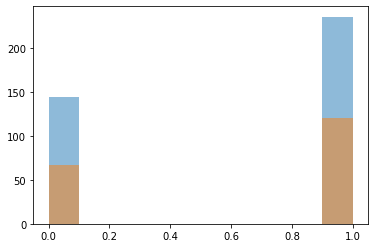

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.show()

# Zadanie
Znajdż najleprzy model dzieląc na zbiór testowy i terningowy dla 

* SVM z jądrem rbf
* SVM z jądrem poly
* SVM liniowego
* Regresji logistycznej


In [63]:
from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_1 = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True)

grid_1.fit(X_train, y_train)
grid_1.best_params_

{'classifier__C': 100,
 'classifier__gamma': 0.001,
 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}

In [36]:
def heatmap(values, xlabel, ylabel, xticklabels, yticklabels, cmap=None,
            vmin=None, vmax=None, ax=None, fmt="%0.2f"):
    if ax is None:
        ax = plt.gca()
    # plot the mean cross-validation scores
    img = ax.pcolor(values, cmap=cmap, vmin=vmin, vmax=vmax)
    img.update_scalarmappable()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(np.arange(len(xticklabels)) + .5)
    ax.set_yticks(np.arange(len(yticklabels)) + .5)
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)
    ax.set_aspect(1)

    for p, color, value in zip(img.get_paths(), img.get_facecolors(),
                               img.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.mean(color[:3]) > 0.5:
            c = 'k'
        else:
            c = 'w'
        ax.text(x, y, fmt % value, color=c, ha="center", va="center")
    return img

In [37]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid_1.cv_results_)
# show the first 5 rows
# display(results.head())

In [38]:
len(results.mean_test_score)

72

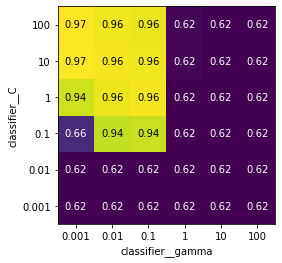

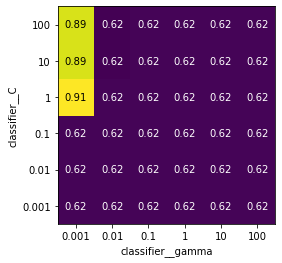

In [52]:
scores = np.array(results.mean_test_score).reshape(6, 6, 2)
scores = scores[:,:,0]
# plot the mean cross-validation scores
heatmap(scores, xlabel='classifier__gamma', xticklabels=param_grid['classifier__gamma'], ylabel='classifier__C', yticklabels=param_grid['classifier__C'], cmap="viridis")
plt.show()

scores = np.array(results.mean_test_score).reshape(6, 6, 2)
scores = scores[:,:,1]
# plot the mean cross-validation scores
heatmap(scores, xlabel='classifier__gamma', xticklabels=param_grid['classifier__gamma'], ylabel='classifier__C', yticklabels=param_grid['classifier__C'], cmap="viridis")
plt.show()

{'classifier__C': 0.1, 'classifier__gamma': 1, 'preprocessing': MinMaxScaler(copy=True, feature_range=(0, 1))}


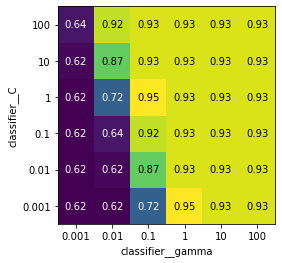

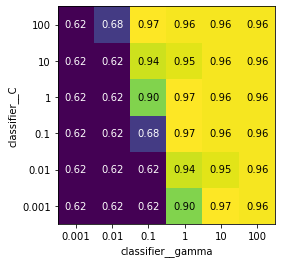

In [53]:
pipe2 = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel='poly'))])


param_grid = {
            'preprocessing': [StandardScaler(), MinMaxScaler()],
            'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_2 = GridSearchCV(pipe2, param_grid, cv=kfold, return_train_score=True)

grid_2.fit(X_train, y_train)
print(grid_2.best_params_)

results2 = pd.DataFrame(grid_2.cv_results_)

scores = np.array(results2.mean_test_score).reshape(6, 6, 2)
# plot the mean cross-validation scores
heatmap(scores[:,:,0], xlabel='classifier__gamma', xticklabels=param_grid['classifier__gamma'], ylabel='classifier__C', yticklabels=param_grid['classifier__C'], cmap="viridis")
plt.show()

scores = np.array(results2.mean_test_score).reshape(6, 6, 2)
# plot the mean cross-validation scores
heatmap(scores[:,:,1], xlabel='classifier__gamma', xticklabels=param_grid['classifier__gamma'], ylabel='classifier__C', yticklabels=param_grid['classifier__C'], cmap="viridis")
plt.show()

{'classifier__C': 1, 'classifier__gamma': 0.001, 'preprocessing': MinMaxScaler(copy=True, feature_range=(0, 1))}


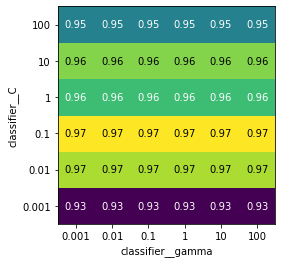

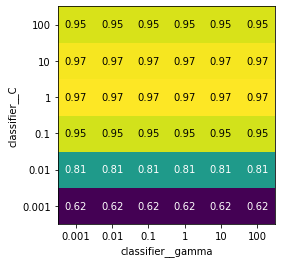

In [54]:
pipe3 = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel='linear'))])

param_grid = {
            'preprocessing': [StandardScaler(), MinMaxScaler()],
            'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_3 = GridSearchCV(pipe3, param_grid, cv=kfold, return_train_score=True)

grid_3.fit(X_train, y_train)
print(grid_3.best_params_)

results3 = pd.DataFrame(grid_3.cv_results_)

scores = np.array(results3.mean_test_score).reshape(6, 6, 2)
# plot the mean cross-validation scores
heatmap(scores[:,:,0], xlabel='classifier__gamma', xticklabels=param_grid['classifier__gamma'], ylabel='classifier__C', yticklabels=param_grid['classifier__C'], cmap="viridis")
plt.show()

scores = np.array(results3.mean_test_score).reshape(6, 6, 2)
# plot the mean cross-validation scores
heatmap(scores[:,:,1], xlabel='classifier__gamma', xticklabels=param_grid['classifier__gamma'], ylabel='classifier__C', yticklabels=param_grid['classifier__C'], cmap="viridis")
plt.show()

c:\users\przem\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\przem\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

{'classifier__C': 0.1, 'preprocessing': StandardScaler(copy=True, with_mean=True, with_std=True)}


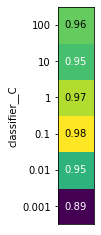

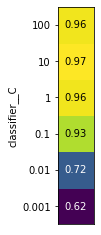

In [55]:
pipe4 = Pipeline([('preprocessing', StandardScaler()), ('classifier', LogisticRegression())])

param_grid = {
            'preprocessing': [StandardScaler(), MinMaxScaler()],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_4 = GridSearchCV(pipe4, param_grid, cv=kfold, return_train_score=True)

grid_4.fit(X_train, y_train)
print(grid_4.best_params_)

results4 = pd.DataFrame(grid_4.cv_results_)

scores = np.array(results4.mean_test_score).reshape(6, 2)
# plot the mean cross-validation scores
heatmap(scores[:,np.newaxis,0], xlabel='', xticklabels=[], ylabel='classifier__C', yticklabels=param_grid['classifier__C'], cmap="viridis")
plt.show()

scores = np.array(results4.mean_test_score).reshape(6, 2)
# plot the mean cross-validation scores
heatmap(scores[:,np.newaxis,1], xlabel='', xticklabels=[], ylabel='classifier__C', yticklabels=param_grid['classifier__C'], cmap="viridis")
plt.show()

In [56]:
from sklearn import  metrics

models = []
models.append(('SVM rbf', grid_1.best_estimator_))
models.append(('SVM poly', grid_2.best_estimator_))
models.append(('SVM linear', grid_3.best_estimator_))
models.append(('LogisticRegression', grid_4.best_estimator_))

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model in models:
    print(name)
    print("R^2: {}".format(metrics.precision_score(y_test, model.predict(X_test)) ))
    print("recall_score: {}".format( metrics.recall_score(y_test, model.predict(X_test)) ))
    print("f1_score: {}".format( metrics.f1_score(y_test, model.predict(X_test)) ))
    print("accuracy_score: {}".format( metrics.accuracy_score(y_test, model.predict(X_test)) ))
    precision_score.append(metrics.precision_score(y_test, model.predict(X_test)))
    recall_score.append(metrics.recall_score(y_test, model.predict(X_test)))
    f1_score.append( metrics.f1_score(y_test, model.predict(X_test)))
    accuracy_score.append(metrics.accuracy_score(y_test, model.predict(X_test)))

SVM rbf
R^2: 0.9834710743801653
recall_score: 0.9834710743801653
f1_score: 0.9834710743801653
accuracy_score: 0.9787234042553191
SVM poly
R^2: 0.9836065573770492
recall_score: 0.9917355371900827
f1_score: 0.9876543209876544
accuracy_score: 0.9840425531914894
SVM linear
R^2: 0.9834710743801653
recall_score: 0.9834710743801653
f1_score: 0.9834710743801653
accuracy_score: 0.9787234042553191
LogisticRegression
R^2: 0.9836065573770492
recall_score: 0.9917355371900827
f1_score: 0.9876543209876544
accuracy_score: 0.9840425531914894


In [57]:
import pandas as pd
d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=[model[0] for model in models])
df

,Method,precision_score,recall_score,f1_score,accuracy_score
0,SVM rbf,0.983471,0.983471,0.983471,0.978723
1,SVM poly,0.983607,0.991736,0.987654,0.984043
2,SVM linear,0.983471,0.983471,0.983471,0.978723
3,LogisticRegression,0.983607,0.991736,0.987654,0.984043
